In [ ]:
! mkdir test-data-and-images/
! pip install internetarchive

In [1]:
import internetarchive

# Downloading data from Internet Archive

Here, we will show how to download the data we've been collecting over the past 2 years:

https://archive.org/details/news-homepages

In [16]:
from internetarchive import search_items, ArchiveSession, get_item

collection_id = 'news-homepages'
search = search_items(f'collection:{collection_id}')
collection_results = list(search)

In [17]:
len(collection_results)

3489

In [18]:
collection = get_item('semafor-2023')
collection_files = list(collection.get_files())
html_files = list(filter(lambda x: x.name.endswith('html'), collection_files))

In [19]:
collection_files[:5]

[File(identifier='semafor-2023', filename='__ia_thumb.jpg', size=17923, format='Item Tile'),
 File(identifier='semafor-2023', filename='semafor-2023-01-01T09:24:31.601933-05:00.accessibility.json', size=11032, format='JSON'),
 File(identifier='semafor-2023', filename='semafor-2023-01-01T09:24:31.601933-05:00.hyperlinks.json', size=5989, format='JSON'),
 File(identifier='semafor-2023', filename='semafor-2023-01-01T09:24:31.601933-05:00.jpg', size=403407, format='JPEG'),
 File(identifier='semafor-2023', filename='semafor-2023-01-01T09:24:31.601933-05:00.lighthouse.json', size=1552, format='JSON')]

In [20]:
html_files[:5]

[File(identifier='semafor-2023', filename='semafor-2023-01-25T21:44:17.462607-05:00.html', size=2240295, format='HTML'),
 File(identifier='semafor-2023', filename='semafor-2023-01-26T09:36:52.164508-05:00.html', size=2116938, format='HTML'),
 File(identifier='semafor-2023', filename='semafor-2023-01-26T21:45:44.012828-05:00.html', size=13171157, format='HTML'),
 File(identifier='semafor-2023', filename='semafor-2023-01-27T09:34:16.271840-05:00.html', size=11580135, format='HTML'),
 File(identifier='semafor-2023', filename='semafor-2023-01-27T21:52:25.300439-05:00.html', size=12396654, format='HTML')]

In [21]:
html_files[0].download('test-data-and-images/semafor-test.html')

# Reading

In [73]:
from IPython.display import display, HTML

In [ ]:
display(HTML('test-data-and-images/semafor-test.html'))

# Finding out the position and space of each article card

When we have the HTML available, we implement a simple bottom-up DOM algorithm.

In [5]:
from IPython.display import Image

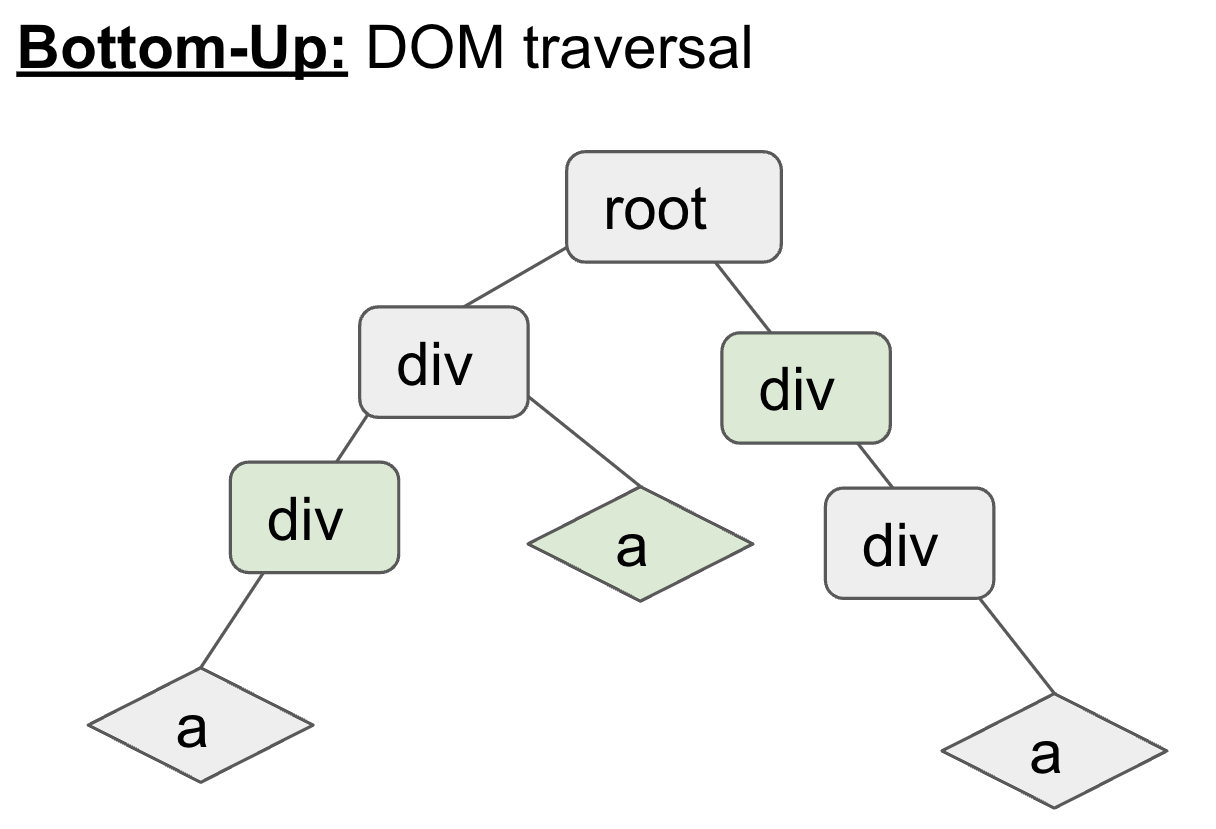

In [6]:
Image('test-data-and-images/html-parsing-diagram.png', width=400)

In [9]:
import sys; sys.path.insert(0, '../scripts/')
import get_bounding_boxes_from_html as bb

In [11]:
page, browser, playwright = await bb.instantiate_new_page_object(headless=False, block_external_files=False)

In [12]:
import os 
import pandas as pd 
file = 'test-data-and-images/semafor-test.html'
browser_fp = f'file://{os.getcwd()}/{file}'
bounding_box = await bb.get_bounding_box_one_file(page, file=browser_fp,)
bounding_box

{'bounding_boxes': [{'href': 'https://www.semafor.com/article/01/25/2023/where-tanks-to-ukraine-are-coming-from',
   'link_text': ' BREAKING 3 HR Europe Which countries have sent tanks to Ukraine so far Diego Mendoza and J.D. Capelouto/Semafor',
   'is_article': True,
   'x': 10,
   'y': 352.7421875,
   'width': 275.625,
   'height': 298.8046875,
   'all_text': ' BREAKING 3 HR Europe Which countries have sent tanks to Ukraine so far Diego Mendoza and J.D. Capelouto/Semafor'},
  {'href': 'https://www.semafor.com/article/01/25/2023/trump-ban-on-facebook-instagram-to-be-lifted',
   'link_text': ' BREAKING 3 HR North America Trump to be reinstated on Facebook, Instagram',
   'is_article': True,
   'x': 10,
   'y': 662.546875,
   'width': 275.625,
   'height': 64.7890625,
   'all_text': ' BREAKING 3 HR North America Trump to be reinstated on Facebook, Instagram'},
  {'href': 'https://www.semafor.com/article/01/25/2023/us-to-provide-31-m1-abrams-tanks-for-ukraine',
   'link_text': ' 9 HR Nor

In [10]:
head_page, _, _ = await bb.instantiate_new_page_object(headless=False, block_external_files=False)

In [11]:
await head_page.goto(browser_fp)

<Response url='file:///Users/spangher/Projects/berkeley-research/homepage-newsworthiness/notebooks/test-data-and-images/semafor-test.html' request=<Request url='file:///Users/spangher/Projects/berkeley-research/homepage-newsworthiness/notebooks/test-data-and-images/semafor-test.html' method='GET'>>

In [14]:
await bb.draw_visual_bounding_boxes_on_page(page, file=browser_fp)

<Page url='file:///Users/spangher/Projects/berkeley-research/homepage-newsworthiness/notebooks/test-data-and-images/semafor-test.html'>

/Users/spangher/Projects/berkeley-research/homepage-newsworthiness/notebooks/../scripts/get_bounding_boxes_from_html.py:713: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grid = grid.fillna(0)


(1272.0, 1935.5078125, 1272.0, 1935.5078125)

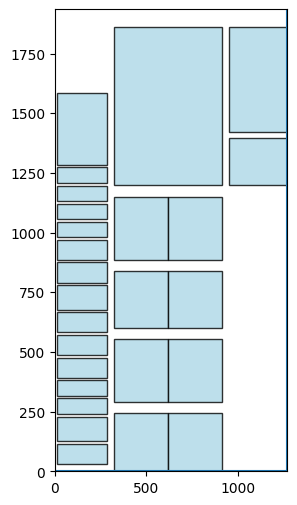

In [15]:
bb.plot_bounding_box_df(
    pd.DataFrame(bounding_box['bounding_boxes']),
    figsize=(3,6), clip_right=True
)